# Prédictions des Avoirs Extérieures 

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor

In [12]:
df=pd.read_excel("C:/Users/hp/Desktop/PFA_BCM/dataframe.xlsx")
df.head()

,Year,Inflation,Investment,Avoirs_Exterieurs_en_millions_mro,Taux_de_change_mensuel_en_dollar,Australie,Canada,Chine,Espagne,France,Italie,Japon,Mauritanie,Exportations_en_millions_mro,M2_en_millions_mro
0,1992,10.141818,0.348815,7484,190.0,0.427678,0.247550,3.257417,0.141241,0.051179,0.048388,0.026117,1.874126,53369.858,26904
1,1993,9.370344,0.871081,5567,191.0,4.045157,0.738843,3.179374,-0.156787,-0.020117,-0.049463,-0.013317,5.873637,58919.858,27172
2,1994,4.128259,0.106933,3943,192.0,3.979706,1.249346,2.985429,0.362246,0.075469,0.124759,0.031418,-3.060732,59775.858,30850
3,1995,6.543791,0.334144,7248,193.0,3.883165,0.745687,2.508456,0.419139,0.067412,0.167437,0.076299,9.819800,64622.858,29302
4,1996,4.681306,-0.020428,8357,196.0,3.863934,0.469531,2.272265,0.404405,0.045216,0.073474,0.090882,5.818827,67257.858,34264


In [13]:
df.columns

Index(['Year', 'Inflation', 'Investment', 'Avoirs_Exterieurs_en_millions_mro',
       'Taux_de_change_mensuel_en_dollar', 'Australie', 'Canada', 'Chine',
       'Espagne', 'France', 'Italie', 'Japon', 'Mauritanie',
       'Exportations_en_millions_mro', 'M2_en_millions_mro'],
      dtype='object')

In [14]:
# Remplacer les virgules par des points et convertir les colonnes numériques en float
df = df.replace(',', '.', regex=True)


# Normalisation des données numériques (ex. MinMax scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=["Year"])), columns=df.columns[1:])

# Afficher les premières lignes après normalisation
df_scaled.head()


,Inflation,Investment,Avoirs_Exterieurs_en_millions_mro,Taux_de_change_mensuel_en_dollar,Australie,Canada,Chine,Espagne,France,Italie,Japon,Mauritanie,Exportations_en_millions_mro,M2_en_millions_mro
0,0.813794,0.297102,0.004184,0.000000,0.142170,0.574198,0.999472,0.688457,0.653980,0.567474,0.673447,0.264494,0.000000,0.000000
1,0.741382,0.310547,0.001919,0.005263,0.816779,0.745356,0.971054,0.576866,0.494559,0.469867,0.534566,0.443220,0.004693,0.000210
2,0.249349,0.290875,0.000000,0.010526,0.804574,0.923206,0.900431,0.771208,0.708293,0.643655,0.692117,0.043970,0.005417,0.003096
3,0.476076,0.296724,0.003905,0.015789,0.786570,0.747740,0.726747,0.792511,0.690277,0.686226,0.850179,0.619562,0.009516,0.001882
4,0.301259,0.287596,0.005216,0.031579,0.782984,0.651532,0.640742,0.786994,0.640646,0.592497,0.901539,0.440771,0.011745,0.005775


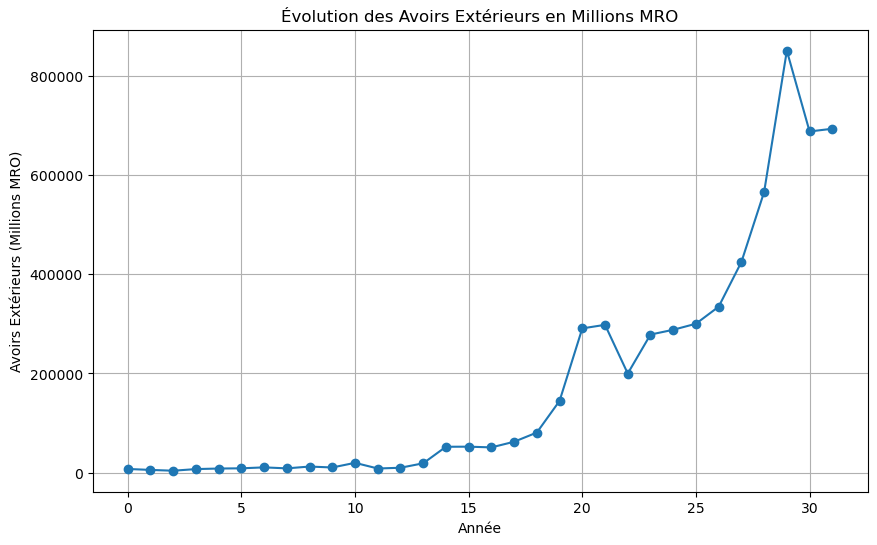

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Avoirs_Exterieurs_en_millions_mro'], marker='o', linestyle='-')
plt.title("Évolution des Avoirs Extérieurs en Millions MRO")
plt.xlabel("Année")
plt.ylabel("Avoirs Extérieurs (Millions MRO)")
plt.grid(True)
plt.show()

In [16]:
# Convertir la colonne 'Taux_de_change_mensuel_en_dollar' en type numérique
df['Taux_de_change_mensuel_en_dollar'] = pd.to_numeric(df['Taux_de_change_mensuel_en_dollar'], errors='coerce')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer les caractéristiques (features) et la cible (target)
X = df.drop(columns=['Avoirs_Exterieurs_en_millions_mro',"Year"])
y = df['Avoirs_Exterieurs_en_millions_mro']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploration des données

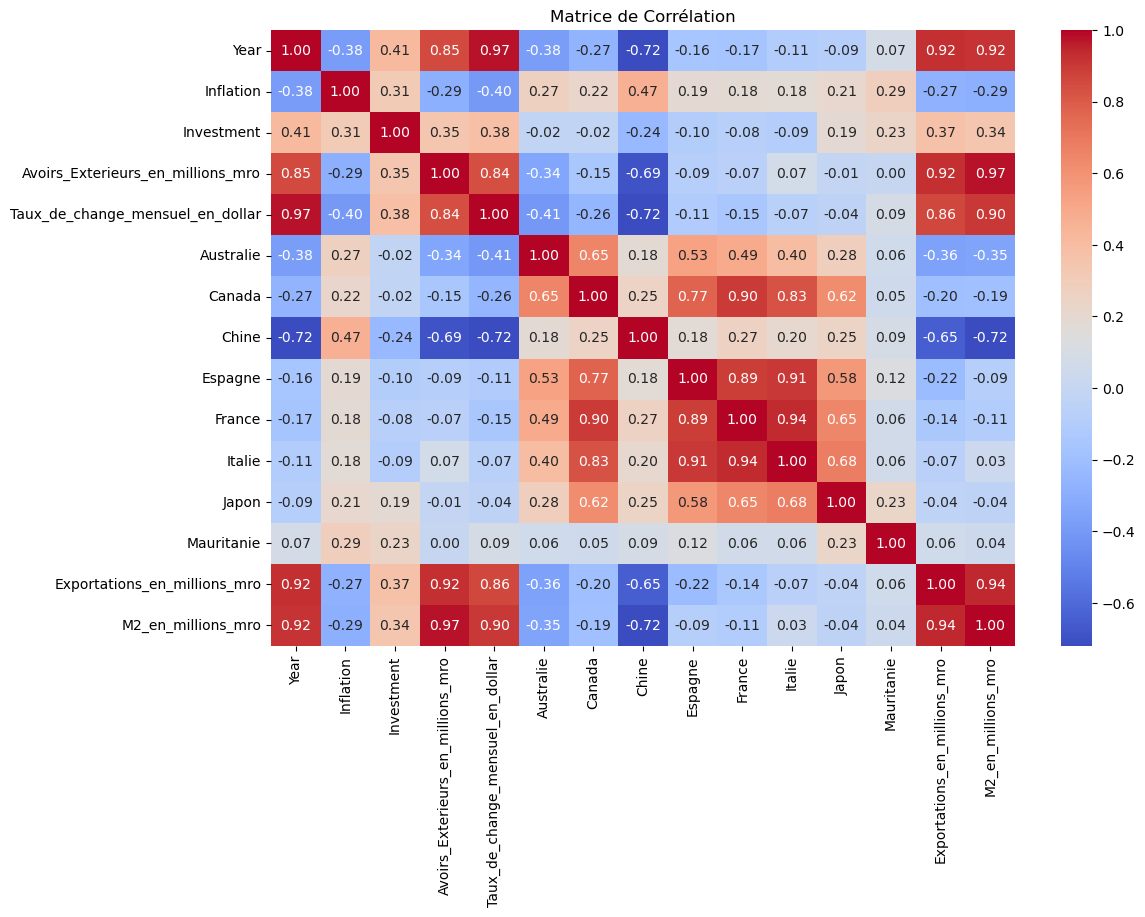

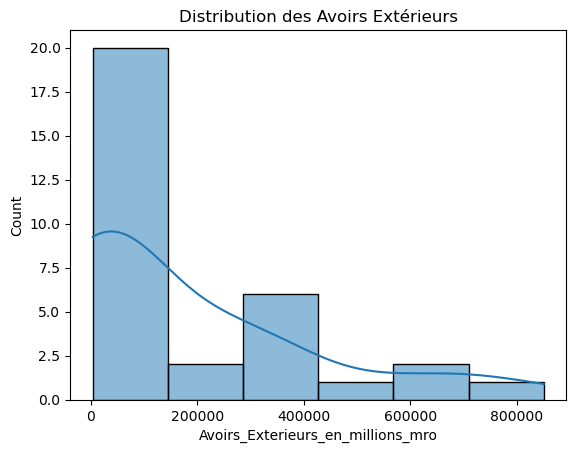

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

# Distribution de la variable cible
sns.histplot(y, kde=True)
plt.title('Distribution des Avoirs Extérieurs')
plt.show()


# Entraînement de modèles

In [19]:
# Initialize the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
knn_model = KNeighborsRegressor(n_neighbors=5)
gbr_model = GradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)  

# Évaluation des modèles

In [20]:
# Train the models
models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'SVR': svr_model,
    'Ridge Regression': ridge_model,
    'Lasso Regression': lasso_model,
    'KNN': knn_model,
    'Gradient Boosting': gbr_model,
    'XGBoost': xgb_model  # Include XGBoost
}

for name, model in models.items():
    model.fit(X_train, y_train)

In [21]:
# Evaluate the models
for name, model in models.items():
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name}:")
    print(f" - Mean Squared Error: {mse:.2f}")
    print(f" - R^2 Score: {r2:.2f}\n")

Linear Regression:
 - Mean Squared Error: 24044149816.58
 - R^2 Score: 0.77

Random Forest:
 - Mean Squared Error: 23115534227.52
 - R^2 Score: 0.78

SVR:
 - Mean Squared Error: 157653451953.91
 - R^2 Score: -0.50

Ridge Regression:
 - Mean Squared Error: 23680941845.04
 - R^2 Score: 0.77

Lasso Regression:
 - Mean Squared Error: 24043423818.72
 - R^2 Score: 0.77

KNN:
 - Mean Squared Error: 55790720186.03
 - R^2 Score: 0.47

Gradient Boosting:
 - Mean Squared Error: 13437378352.01
 - R^2 Score: 0.87

XGBoost:
 - Mean Squared Error: 32605497849.39
 - R^2 Score: 0.69



# Visualisation des résultats

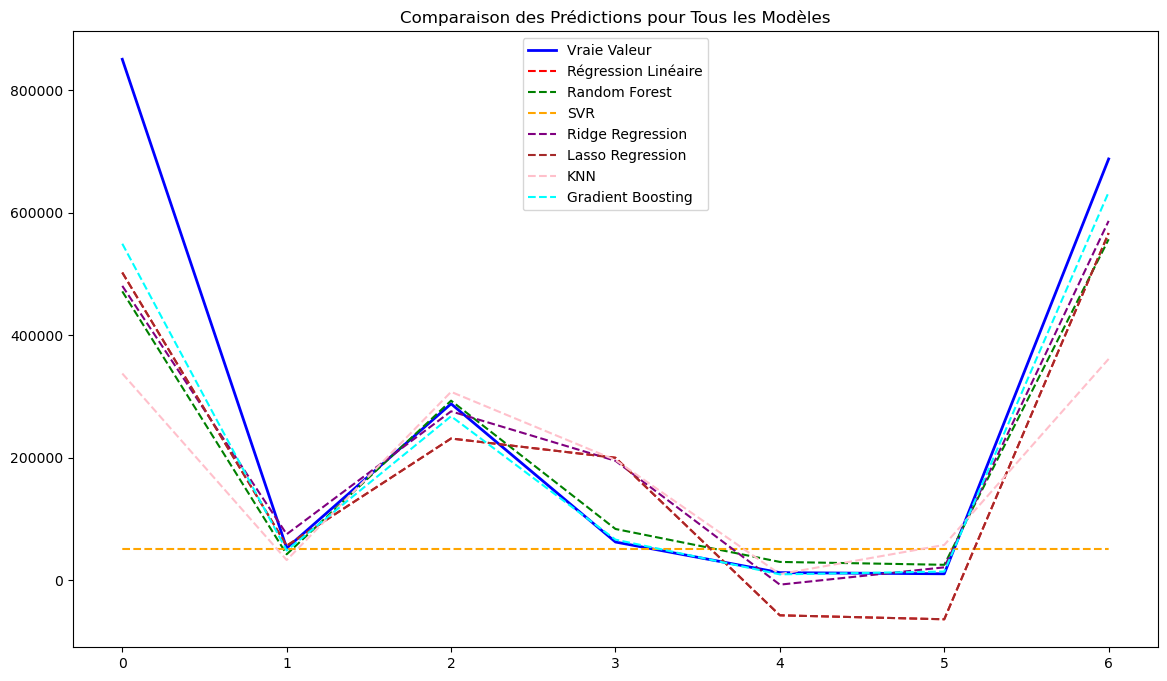

In [22]:
# Predictions for comparison plot
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
gbr_predictions = gbr_model.predict(X_test)

# Plot the comparison of predictions
plt.figure(figsize=(14, 8))

# Comparing the predictions
plt.plot(y_test.values, label='Vraie Valeur', color='blue', linewidth=2)
plt.plot(lr_predictions, label='Régression Linéaire', color='red', linestyle='--')
plt.plot(rf_predictions, label='Random Forest', color='green', linestyle='--')
plt.plot(svr_predictions, label='SVR', color='orange', linestyle='--')
plt.plot(ridge_predictions, label='Ridge Regression', color='purple', linestyle='--')
plt.plot(lasso_predictions, label='Lasso Regression', color='brown', linestyle='--')
plt.plot(knn_predictions, label='KNN', color='pink', linestyle='--')
plt.plot(gbr_predictions, label='Gradient Boosting', color='cyan', linestyle='--')

plt.title('Comparaison des Prédictions pour Tous les Modèles')
plt.legend(loc='best')
plt.show()


# Régression Linéaire : Coefficients des variables

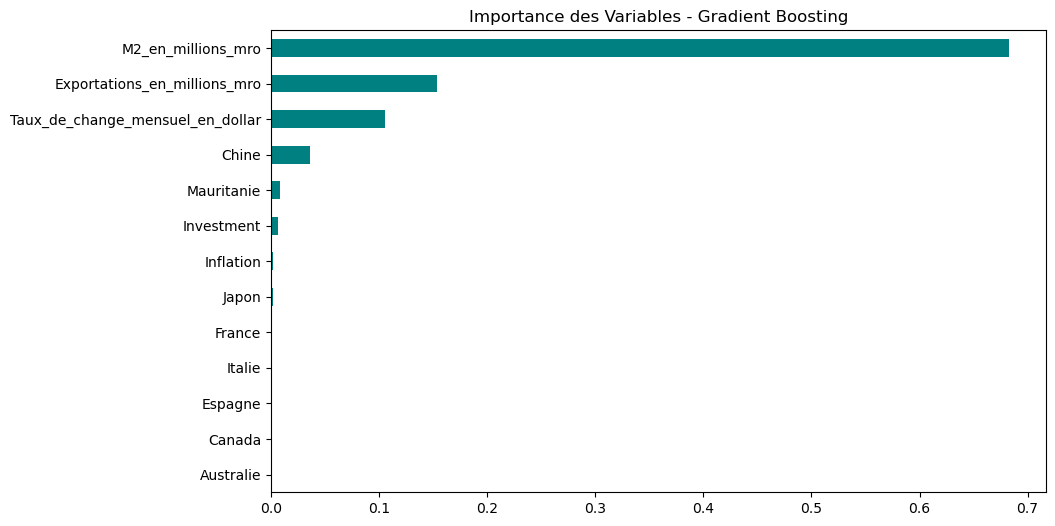

In [23]:
# Obtenir les importances des caractéristiques du modèle Gradient Boosting
feature_importances = pd.Series(gbr_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values()

# Visualiser les importances des caractéristiques
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', color='teal')
plt.title('Importance des Variables - Gradient Boosting')
plt.show()




In [24]:
feature_importances 

Australie                           0.000151
Canada                              0.000331
Espagne                             0.000345
Italie                              0.000713
France                              0.000996
Japon                               0.001884
Inflation                           0.001942
Investment                          0.006197
Mauritanie                          0.008802
Chine                               0.036551
Taux_de_change_mensuel_en_dollar    0.105334
Exportations_en_millions_mro        0.153896
M2_en_millions_mro                  0.682857
dtype: float64

In [13]:
from statsmodels.stats.stattools import durbin_watson

# Prédire les valeurs pour le jeu d'entraînement
lr_train_predictions = lr_model.predict(X_train)

# Calculer les résidus (erreurs)
residuals = y_train - lr_train_predictions

# Effectuer le test Durbin-Watson
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_statistic:.2f}")


Durbin-Watson Statistic: 2.30


Number of residuals: 25


<Figure size 1000x600 with 0 Axes>

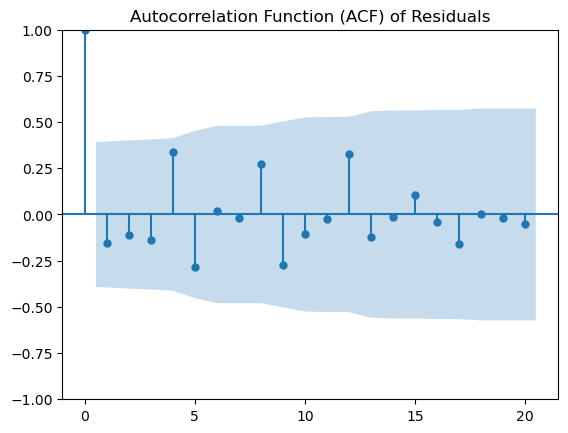

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

# Check the length of residuals
n_residuals = len(residuals)
print(f"Number of residuals: {n_residuals}")

# Set the lags to be smaller than the number of residuals
lags = min(20, n_residuals - 1)  # Set lags to a reasonable number, e.g., 20 or less

# Plot the autocorrelation of the residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=lags)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()


<Figure size 1000x600 with 0 Axes>

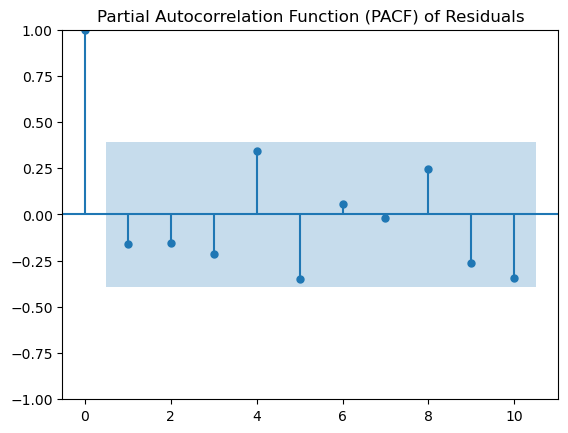

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

# Determine the maximum allowed number of lags
max_lags = len(residuals) // 2

# Set the lags to be less than max_lags
lags = min(10, max_lags)  # Set to 10 or lower, depending on your data size

# Plot the partial autocorrelation of the residuals
plt.figure(figsize=(10, 6))
plot_pacf(residuals, lags=lags)
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.show()


In [ ]:
les v: